In [1]:
import csv
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
car_df = pd.read_csv('./data.csv')

In [3]:
car_df.shape

(11914, 16)

In [4]:
car_df = car_df.dropna()
car_df = pd.get_dummies(car_df, columns=['Make'])
car_df = pd.get_dummies(car_df, columns=['EngineFuelType'])
car_df = pd.get_dummies(car_df, columns=['TransmissionType'])
car_df = pd.get_dummies(car_df, columns=['Driven_Wheels'])
car_df = pd.get_dummies(car_df, columns=['VehicleSize'])
car_df = pd.get_dummies(car_df, columns=['VehicleStyle'])

In [5]:
car_df["Price"] = ""
car_df.loc[car_df['MSRP'] <= 50000 , "Price"] = 0
car_df.loc[car_df['MSRP'] > 50000, "Price"] = 1

car_df['Price'] = pd.to_numeric(car_df['Price'], errors='coerce')
car_df = car_df.dropna(subset=['Price'])
car_df['Price'] = car_df['Price'].astype(int)

In [6]:
car_df['EngineHP'] = pd.to_numeric(car_df['EngineHP'], errors='coerce')
car_df = car_df.dropna(subset=['EngineHP'])
car_df['EngineHP'] = car_df['EngineHP'].astype(int)

car_df['EngineCylinders'] = pd.to_numeric(car_df['EngineCylinders'], errors='coerce')
car_df = car_df.dropna(subset=['EngineCylinders'])
car_df['EngineCylinders'] = car_df['EngineCylinders'].astype(int)

car_df['NumberofDoors'] = pd.to_numeric(car_df['NumberofDoors'], errors='coerce')
car_df = car_df.dropna(subset=['NumberofDoors'])
car_df['NumberofDoors'] = car_df['NumberofDoors'].astype(int)

In [7]:
car_df.head()

,Model,Year,EngineHP,EngineCylinders,NumberofDoors,MarketCategory,highwayMPG,citympg,Popularity,MSRP,...,VehicleStyle_Convertible SUV,VehicleStyle_Coupe,VehicleStyle_Crew Cab Pickup,VehicleStyle_Extended Cab Pickup,VehicleStyle_Passenger Minivan,VehicleStyle_Passenger Van,VehicleStyle_Regular Cab Pickup,VehicleStyle_Sedan,VehicleStyle_Wagon,Price
4,1 Series,2011.0,230,6,2,Luxury,28.0,18.0,3916.0,54500.0,...,0,0,0,0,0,0,0,0,0,1
8,1 Series,2012.0,230,6,2,Luxury,28.0,18.0,3916.0,36900.0,...,0,0,0,0,0,0,0,0,0,0
9,1 Series,2013.0,230,6,2,Luxury,27.0,18.0,3916.0,37200.0,...,0,0,0,0,0,0,0,0,0,0
13,1 Series,2013.0,230,6,2,Luxury,28.0,19.0,3916.0,37200.0,...,0,0,0,0,0,0,0,0,0,0
17,100,1992.0,172,6,4,Luxury,24.0,17.0,3105.0,2000.0,...,0,0,0,0,0,0,0,1,0,0


In [8]:
x = car_df.drop(['Model','MarketCategory','highwayMPG','citympg','Popularity','MSRP','Price'],axis=1)
y = car_df['Price'].values.reshape(-1,1)

In [9]:
x.head()

,Year,EngineHP,EngineCylinders,NumberofDoors,Make_Acura,Make_Audi,Make_BMW,Make_Buick,Make_Cadillac,Make_Chevrolet,...,VehicleStyle_Convertible,VehicleStyle_Convertible SUV,VehicleStyle_Coupe,VehicleStyle_Crew Cab Pickup,VehicleStyle_Extended Cab Pickup,VehicleStyle_Passenger Minivan,VehicleStyle_Passenger Van,VehicleStyle_Regular Cab Pickup,VehicleStyle_Sedan,VehicleStyle_Wagon
4,2011.0,230,6,2,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
8,2012.0,230,6,2,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
9,2013.0,230,6,2,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
13,2013.0,230,6,2,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
17,1992.0,172,6,4,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [10]:
y.shape

(4430, 1)

In [11]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(x)
y_scaled = scaler.fit_transform(y)

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size = 0.30)

In [13]:
print("x_train: ",X_train.shape)
print("y_train: ",y_train.shape)
print("x_test: ",X_test.shape)
print("y_test: ",y_test.shape)

x_train:  (3101, 70)
y_train:  (3101, 1)
x_test:  (1329, 70)
y_test:  (1329, 1)


In [14]:
import tensorflow.keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler
import keras

model = Sequential()
model.add(Dense(35, input_shape=(70,70), activation='relu'))
model.add(Dense(45, activation='sigmoid'))
model.add(Dense(1, activation='linear'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 70, 35)            2485      
_________________________________________________________________
dense_1 (Dense)              (None, 70, 45)            1620      
_________________________________________________________________
dense_2 (Dense)              (None, 70, 1)             46        
Total params: 4,151
Trainable params: 4,151
Non-trainable params: 0
_________________________________________________________________


In [15]:
metrics = ['accuracy']
optimizer = keras.optimizers.Adam(lr=0.03)
model.compile(optimizer=optimizer, loss='mean_squared_error',metrics=metrics)

In [16]:
epochs_hist = model.fit(X_train, y_train, epochs=100, batch_size=25,  verbose=1, validation_split=0.15)

Epoch 1/100
106/106 [==============================] - 2s 18ms/step - loss: 0.0840 - accuracy: 0.9460 - val_loss: 0.0449 - val_accuracy: 0.9592
Epoch 2/100
106/106 [==============================] - 0s 3ms/step - loss: 0.0273 - accuracy: 0.9706 - val_loss: 0.0251 - val_accuracy: 0.9678
Epoch 3/100
106/106 [==============================] - 0s 3ms/step - loss: 0.0201 - accuracy: 0.9784 - val_loss: 0.0284 - val_accuracy: 0.9657
Epoch 4/100
106/106 [==============================] - 0s 2ms/step - loss: 0.0263 - accuracy: 0.9723 - val_loss: 0.0328 - val_accuracy: 0.9721
Epoch 5/100
106/106 [==============================] - 0s 2ms/step - loss: 0.0246 - accuracy: 0.9717 - val_loss: 0.0290 - val_accuracy: 0.9742
Epoch 6/100
106/106 [==============================] - 0s 2ms/step - loss: 0.0232 - accuracy: 0.9753 - val_loss: 0.0291 - val_accuracy: 0.9678
Epoch 7/100
106/106 [==============================] - 0s 2ms/step - loss: 0.0189 - accuracy: 0.9792 - val_loss: 0.0263 - val_accuracy: 0.972

In [17]:
print(epochs_hist.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


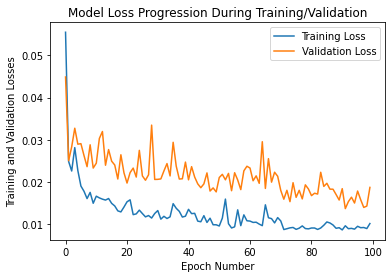

In [18]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])

plt.title('Model Loss Progression During Training/Validation')
plt.ylabel('Training and Validation Losses')
plt.xlabel('Epoch Number')
plt.legend(['Training Loss', 'Validation Loss'])

In [21]:
from sklearn.metrics import accuracy_score
y_pred1 = model.predict(X_test)
y_pred = np.argmax(y_pred1, axis=1)

# Printaccuracy score
print(accuracy_score(y_test, y_pred)*100)

94.80812641083521


In [22]:
from sklearn import metrics
metrics.confusion_matrix(y_test,y_pred)

array([[1260,    0],
       [  69,    0]], dtype=int64)